In [13]:
import numpy as np
import matplotlib.pyplot as plt

class MazeGen():
    def __init__(self,row:int,col:int,random_start = False):
        self._row = row
        self._col = col
        self._random_start = random_start

        self._player = [0,0]
        self._trap = []
        self._star = []
        self._terminal= [self._row-1,self._col-1]
        
        
        self._step_reward = -1
        self._star_reward = 10 
        self._trap_reward = -10
        self._terminal_reward = 100
        
        self._terminal_status = False
        
        self._set_up_maze()
    
    def reset(self):
        self._player = [0,0]
        self._terminal_status = False
        self._set_up_maze()
    
    def _set_up_maze(self):
        """ maze has no walls """
        self._maze = np.zeros([self._row,self._col])
        
    def _get_state_info(self,loc):
        """ return the state info of that loc"""
        
        info = []
        
        if loc[0]<0 or loc[0]>= self._row or loc[1]<0 or loc[1] >= self._col:
            info.append('out')
        if loc[0] == 0:
            info.append("left edge")
        if loc[0] == self._row - 1:
            info.append("right edge")
        if loc[1] == 0:
            info.append("down edge")
        if loc[1] == self._col -1:
            info.append("up edge")
        if loc in self._trap:
            info.append("trap")
        if loc in self._star:
            info.append("star")
        if loc == self._terminal:
            info.append("terminal")
        if loc == self._player:
            info.append("player")

        return info
    
    def _check_reward(self,loc):
        """ return current loc reward """
        info = self._get_state_info(loc)
        if "star" in info:
            return self._star_reward
        if "trap" in info:
            return self._trap_reward
        if "terminal" in info:
            return self._terminal_reward

        return self._step_reward
    
    def _check_action_reward(self,action,loc):
        """ take action, and check if target loc_1 is off grid"""
        if action == "up":
            loc_1 = [loc[0],loc[1]+1]
        if action == "down":
            loc_1 = [loc[0],loc[1]-1]
        if action == "left":
            loc_1 = [loc[0]-1,loc[1]]
        if action == "right":
            loc_1 = [loc[0]+1,loc[1]]
        assert (0 <= loc_1[0] < self._row ) & (0 <= loc_1[1] < self._col)
        return loc_1,self._check_reward(loc_1)
    
    def _apply_action(self,aciton,loc):
        """ apply action from loc to loc_1 
            if loc on a _star, it is gone  """
        if loc in self._star:
            self._star.remove(loc)

        loc_1,r = self._check_action_reward(aciton,loc)
        
        
        
        return loc_1



    def set_grid(self,player = None,star = None,trap = None,terminal = None):
        """ 
            this script will replace _player, and _terminal.
            this script will add _star and _trap
            required format [x,y]
            default one _terminal state
            
                                            """
        if player is not None:
            self._player = player
        if star is not None:
            self._star.append(star)
        if trap is not None:
            self._trap.append(trap)
        if terminal is not None:
            self._terminal = terminal
    
    def set_reward(self, step_reward = -1, star_reward = 10, trap_reward = -10):
        """
            this script will replace rewards set
                                                """
        self._step_reward = step_reward
        self._star_reward = star_reward
        self._trap_reward = trap_reward
        

    def _avaiable_actions(self,loc):
        """ list avaiable actions """
        
        actions = ['up','down','left','right']
        info = self._get_state_info(loc)
        
        if "up edge" in info:
            actions.remove("up")
        if "down edge" in info:
            actions.remove("down")
        if "left edge" in info:
            actions.remove("left")
        if "right edge" in info:
            actions.remove("right")
            
        return actions
        
    def render(self,figsize = (10,5)):
        """ modify figsize as a parameter """
        plt.figure(figsize=figsize)
        plt.imshow(self._maze, interpolation='none', origin='lower', cmap='Greys')
 
        for _star in self._star:
            plt.plot(_star[0], _star[1], 'y*', mec='none', markersize=17)
        for _trap in self._trap:
            plt.plot(_trap[0], _trap[1], 'rX', mec='none', markersize=17)

        plt.plot(self._terminal[0], self._terminal[1], 'D', mec='none', markersize=17)
        plt.plot(self._player[0], self._player[1], 'bo', mec='none', markersize=8)
        plt.xlim(-0.5, self._row - 0.5)
        plt.ylim(-0.5, self._col - 0.5)
        plt.xticks(np.arange(-0.5,self._row+0.5,step = 1),np.arange(self._row))
        plt.yticks(np.arange(-0.5,self._col+0.5,step = 1),np.arange(self._col))
        plt.grid(True)

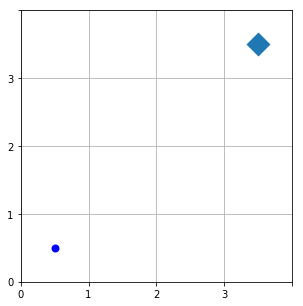

In [14]:
maze = MazeGen(4,4)
maze.render()

In [15]:
maze._get_state_info([3,3])

['right edge', 'up edge', 'terminal']

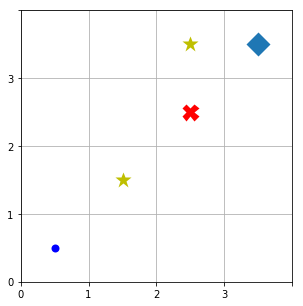

In [16]:
maze.set_grid(star=[1,1])
maze.set_grid(star=[2,3])
maze.set_grid(trap=[2,2])
maze.render()

In [17]:
maze._check_action_reward('up',[2,2])

([2, 3], 10)

In [10]:
maze._apply_action('up',[2,2])

[2, 3]

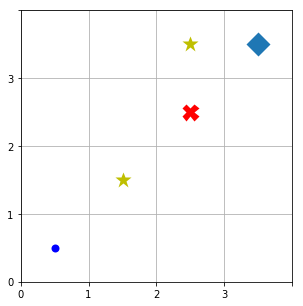

In [11]:
maze.render()

In [12]:
maze._check_reward([2,3])

10